In [79]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

## データの読み込み

In [2]:
#学習データの取り込み
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#学習データの中身確認
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
pdp.ProfileReport(train)

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [8]:
#学習データのサマリ
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
#欠損値確認
print(train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False))
print(test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64
PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1


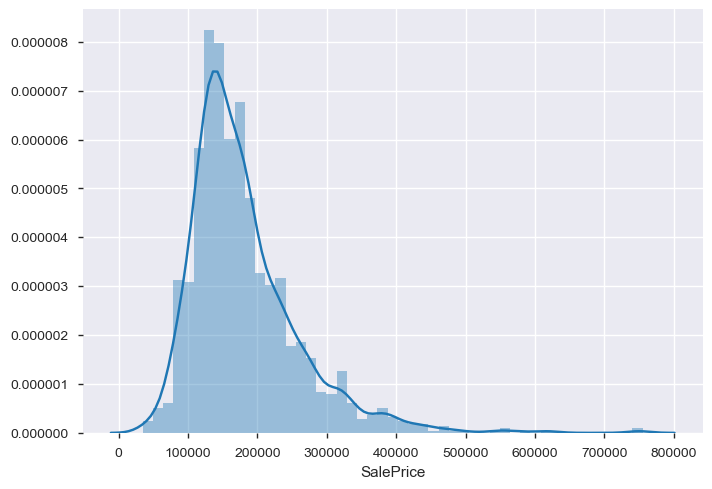

In [10]:
#SalePriceのヒストグラム
sns.distplot(train.SalePrice)

In [11]:
#相関関係
corrmat = train.corr()
corrmat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


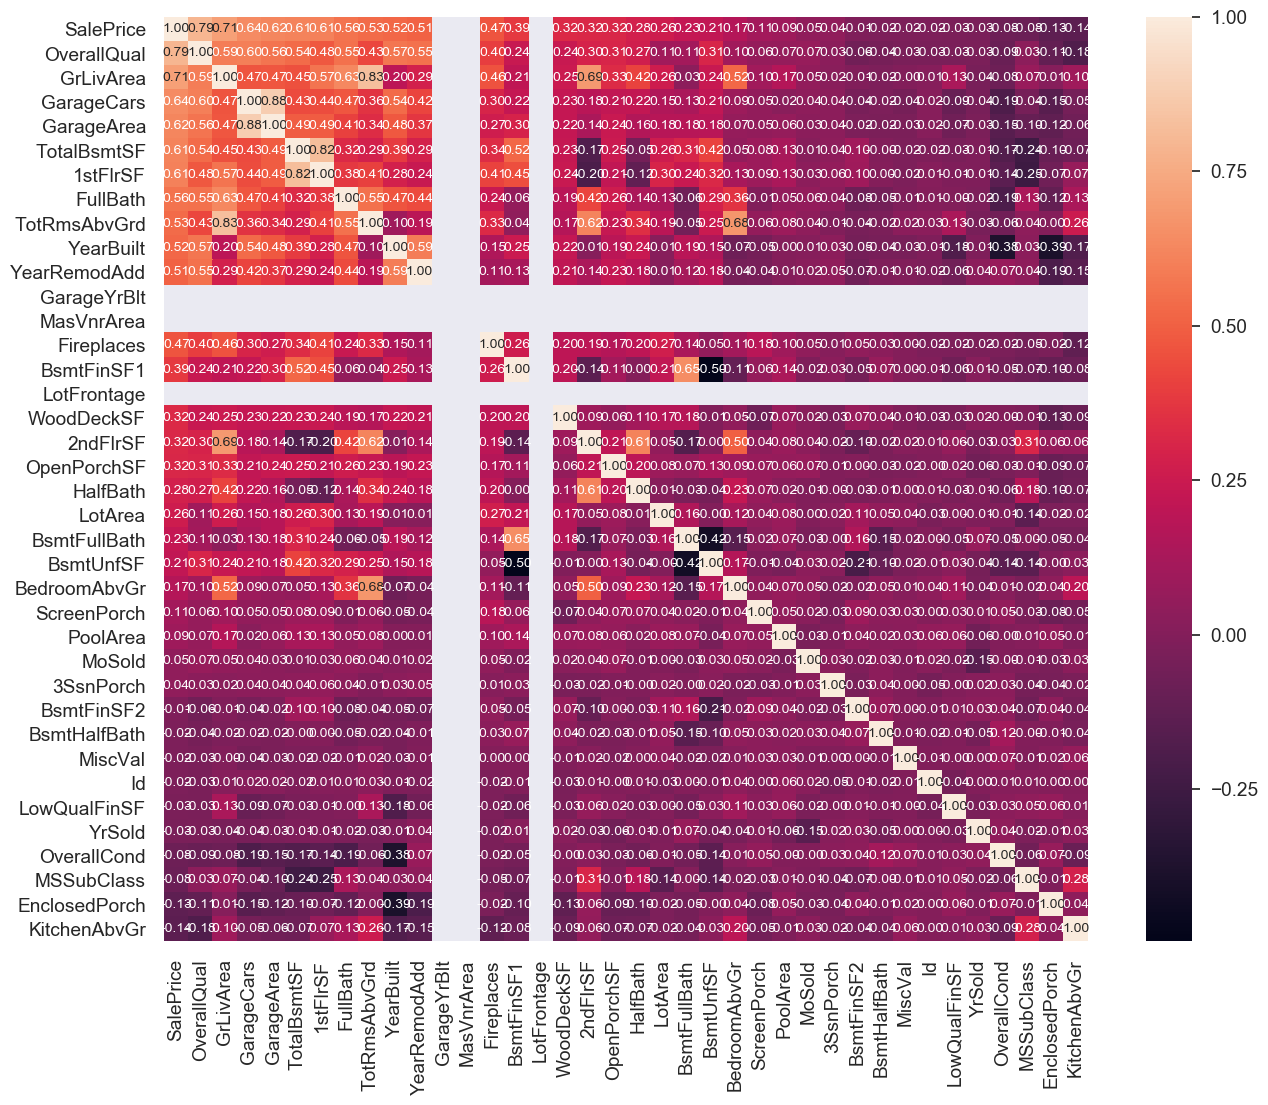

In [12]:
# 算出した相関係数を相関が高い順に上位10個のデータを表示

# ヒートマップに表示させるカラムの数
k = 61

# SalesPriceとの相関が大きい上位10個のカラム名を取得
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# SalesPriceとの相関が大きい上位10個のカラムを対象に相関を算出
# .T(Trancepose[転置行列])を行う理由は、corrcoefで相関を算出する際に、各カラムの値を行毎にまとめなければならない為
cm = np.corrcoef(train[cols].values.T)

# ヒートマップのフォントサイズを指定
sns.set(font_scale=1.25)

#ヒートマップの大きさを指定
fig, ax = plt.subplots(figsize=(15, 12)) 

# 算出した相関データをヒートマップで表示
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [13]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
       'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
       'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
       'EnclosedPorch', 'KitchenAbvGr'],
      dtype='object')

In [14]:
cm_df = pd.DataFrame(cm)
cm_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,...,-0.011378,-0.016844,-0.021190,-0.021917,-0.025606,-0.028923,-0.077856,-0.084284,-0.128578,-0.135907
1,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,...,-0.059119,-0.040150,-0.031406,-0.028365,-0.030429,-0.027347,-0.091932,0.032628,-0.113937,-0.183882
2,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,...,-0.009640,-0.018918,-0.002416,0.008273,0.134683,-0.036526,-0.079686,0.074853,0.009113,0.100063
3,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,...,-0.038264,-0.020891,-0.043080,0.016570,-0.094480,-0.039117,-0.185758,-0.040110,-0.151434,-0.050634
4,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,...,-0.018227,-0.024536,-0.027400,0.017634,-0.067601,-0.027378,-0.151521,-0.098672,-0.121777,-0.064433
5,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,...,0.104810,-0.000315,-0.018479,-0.015415,-0.033245,-0.014969,-0.171098,-0.238518,-0.095478,-0.068901
6,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,...,0.097117,0.001956,-0.021096,0.010496,-0.014241,-0.013604,-0.144203,-0.251758,-0.065292,0.068101
7,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,...,-0.076444,-0.054536,-0.014290,0.005587,-0.000710,-0.019669,-0.194149,0.131608,-0.115093,0.133115
8,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,...,-0.035227,-0.023836,0.024763,0.027239,0.131185,-0.034516,-0.057583,0.040380,0.004151,0.256045
9,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,...,-0.049107,-0.038162,-0.034383,-0.012713,-0.183784,-0.013618,-0.375983,0.027850,-0.387268,-0.174800


//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


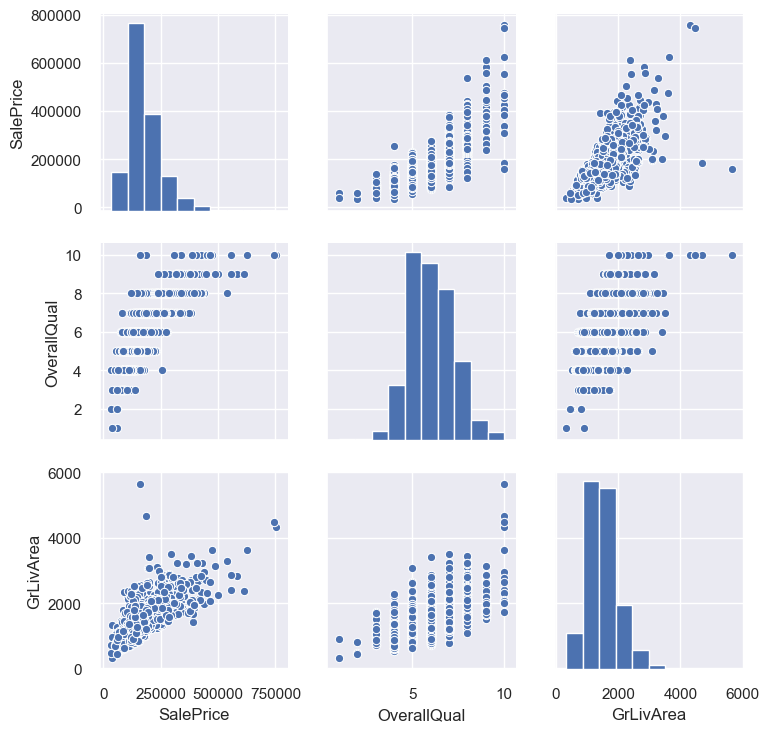

In [15]:
# 散布図の表示
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [16]:
# 数値の大きい上位2位のデータを表示
train.sort_values(by = 'GrLivArea', ascending = False)[:2]
#ascending=False は'GrLivArea'の高いデータから順に並べ替えられる

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [17]:
#データ削除
train = train.drop(index = train[train['Id'] == 1299].index)
train = train.drop(index = train[train['Id'] == 524].index)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


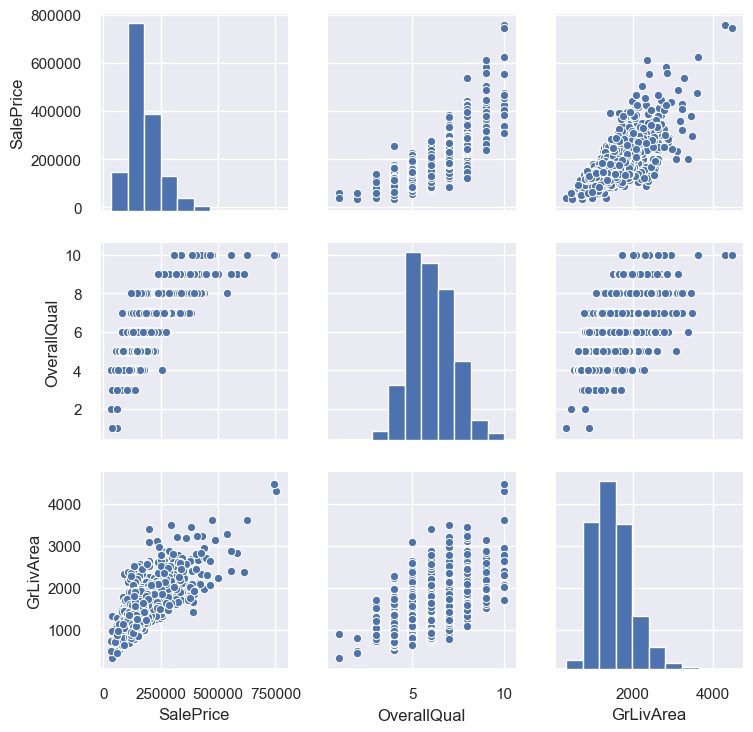

In [18]:
# 削除を確認
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [19]:
#train
na_col_list = train.isnull().sum()[train.isnull().sum()>0].index.tolist() # 欠損を含むカラムをリスト化
train[na_col_list].dtypes.sort_values() #データ型

#test
na_col_list_test =test.isnull().sum()[test.isnull().sum()>0].index.tolist() # 欠損を含むカラムをリスト化
test[na_col_list_test].dtypes.sort_values() #データ型

TotalBsmtSF     float64
BsmtUnfSF       float64
BsmtFinSF2      float64
BsmtFinSF1      float64
GarageYrBlt     float64
BsmtFullBath    float64
GarageCars      float64
BsmtHalfBath    float64
GarageArea      float64
LotFrontage     float64
MasVnrArea      float64
GarageQual       object
GarageCond       object
GarageType       object
PoolQC           object
FireplaceQu      object
Fence            object
Functional       object
GarageFinish     object
MSZoning         object
MiscFeature      object
BsmtFinType2     object
BsmtFinType1     object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
MasVnrType       object
Exterior2nd      object
Exterior1st      object
Utilities        object
Alley            object
KitchenQual      object
SaleType         object
dtype: object

In [20]:
#train
# floatの場合は0
# objectの場合は'NA'
na_float_cols = train[na_col_list].dtypes[train[na_col_list].dtypes=='float64'].index.tolist() #float64
na_obj_cols = train[na_col_list].dtypes[train[na_col_list].dtypes=='object'].index.tolist() #object
# float64型で欠損している場合は0を代入
for na_float_col in na_float_cols:
    train.loc[train[na_float_col].isnull(),na_float_col] = 0.0
# object型で欠損している場合は'NA'を代入
for na_obj_col in na_obj_cols:
    train.loc[train[na_obj_col].isnull(),na_obj_col] = 'NA'
    
#test
# floatの場合は0
# objectの場合は'NA'
na_float_cols_test = test[na_col_list_test].dtypes[test[na_col_list_test].dtypes=='float64'].index.tolist() #float64
na_obj_cols_test = test[na_col_list_test].dtypes[test[na_col_list_test].dtypes=='object'].index.tolist() #object
# float64型で欠損している場合は0を代入
for na_float_col_test in na_float_cols_test:
    test.loc[test[na_float_col_test].isnull(),na_float_col_test] = 0.0
# object型で欠損している場合は'NA'を代入
for na_obj_col_test in na_obj_cols_test:
    test.loc[test[na_obj_col_test].isnull(),na_obj_col_test] = 'NA'

In [21]:
#欠損値確認
print(train.isnull().sum()[train.isnull().sum()>0].sort_values(ascending=False))
print(test.isnull().sum()[test.isnull().sum()>0].sort_values(ascending=False))

Series([], dtype: int64)
Series([], dtype: int64)


In [22]:
#カテゴリ変数を離散数値に変換
#train
from sklearn.preprocessing import LabelEncoder

for i in range(train.shape[1]):
    if train.iloc[:,i].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train.iloc[:,i].values))
        train.iloc[:,i] = lbl.transform(list(train.iloc[:,i].values))

#test
for i in range(test.shape[1]):
    if test.iloc[:,i].dtypes == object:
        lbl_test = LabelEncoder()
        lbl_test.fit(list(test.iloc[:,i].values))
        test.iloc[:,i] = lbl_test.transform(list(test.iloc[:,i].values))

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,80.0,11622,1,1,3,3,0,...,120,0,2,2,1,0,6,2010,9,4
1,1462,20,4,81.0,14267,1,1,0,3,0,...,0,0,2,4,0,12500,6,2010,9,4
2,1463,60,4,74.0,13830,1,1,0,3,0,...,0,0,2,2,1,0,3,2010,9,4
3,1464,60,4,78.0,9978,1,1,0,3,0,...,0,0,2,4,1,0,6,2010,9,4
4,1465,120,4,43.0,5005,1,1,0,1,0,...,144,0,2,4,1,0,1,2010,9,4


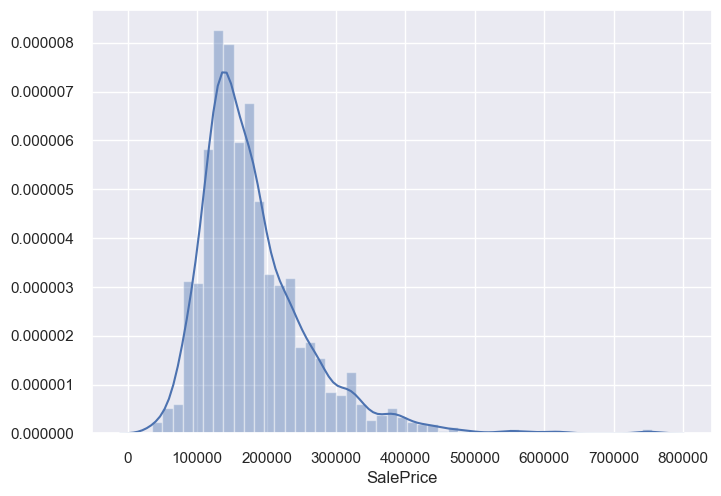

In [25]:
sns.distplot(train['SalePrice'])

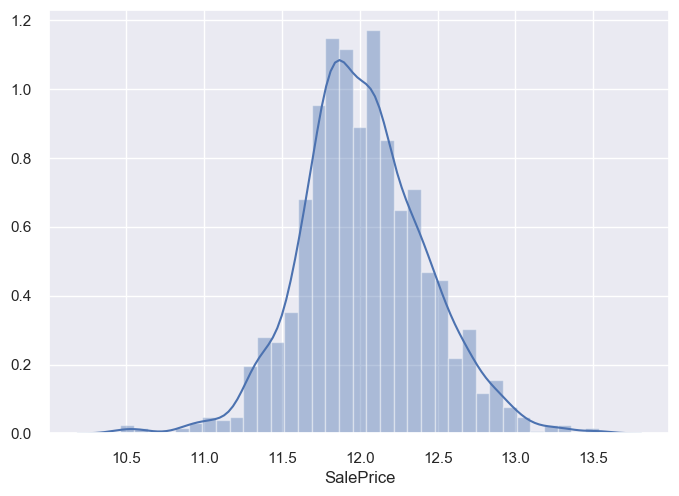

In [26]:
sns.distplot(np.log1p(train['SalePrice']))

In [27]:
#SalePriceを対数化
y_train = np.log1p(train[["SalePrice"]])
y_train.head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


##新しい特徴量を作る

In [28]:
#住居の地下、1階,2階の面積の総和
#train
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
 
#test
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

In [29]:
#物件の面積を部屋数で割った１部屋当たりの面積
#train
train["FeetPerRoom"] =  train["TotalSF"]/train["TotRmsAbvGrd"]

#test
test["FeetPerRoom"] =  test["TotalSF"]/test["TotRmsAbvGrd"]

In [30]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,FeetPerRoom
0,1,60,3,65.0,8450,1,1,3,3,0,...,4,1,0,2,2008,8,4,208500,2566,320.750000
1,2,20,3,80.0,9600,1,1,3,3,0,...,4,1,0,5,2007,8,4,181500,2524,420.666667
2,3,60,3,68.0,11250,1,1,0,3,0,...,4,1,0,9,2008,8,4,223500,2706,451.000000
3,4,70,3,60.0,9550,1,1,0,3,0,...,4,1,0,2,2006,8,0,140000,2473,353.285714
4,5,60,3,84.0,14260,1,1,0,3,0,...,4,1,0,12,2008,8,4,250000,3343,371.444444


In [31]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,FeetPerRoom
0,1461,20,3,80.0,11622,1,1,3,3,0,...,2,2,1,0,6,2010,9,4,1778.0,355.600000
1,1462,20,4,81.0,14267,1,1,0,3,0,...,2,4,0,12500,6,2010,9,4,2658.0,443.000000
2,1463,60,4,74.0,13830,1,1,0,3,0,...,2,2,1,0,3,2010,9,4,2557.0,426.166667
3,1464,60,4,78.0,9978,1,1,0,3,0,...,2,4,1,0,6,2010,9,4,2530.0,361.428571
4,1465,120,4,43.0,5005,1,1,0,1,0,...,2,4,1,0,1,2010,9,4,2560.0,512.000000


In [32]:
numeric_feats = train.dtypes[train.dtypes != "object"].index
numeric_feats_test = test.dtypes[test.dtypes != "object"].index

In [33]:
# 歪度確認 train
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})


Skew in numerical features: 



In [34]:
# 歪度確認 test
skewed_feats_test = test[numeric_feats_test].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness_test = pd.DataFrame({'Skew' :skewed_feats_test})
skewness_test.head(10)


Skew in numerical features: 



,Skew
Utilities,26.953689
PoolArea,20.176117
MiscVal,20.054543
LowQualFinSF,16.150628
Heating,14.475300
3SsnPorch,12.511336
RoofMatl,11.929790
MiscFeature,5.114286
LandSlope,4.963280
EnclosedPorch,4.664371


In [35]:
#train boxcox
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)

print(skewness)

There are 83 skewed numerical features to Box Cox transform
                    Skew
Utilities      38.144471
MiscVal        24.434913
PoolArea       15.932532
Condition2     13.676313
LotArea        12.560986
3SsnPorch      10.286510
Heating         9.838030
LowQualFinSF    8.995688
RoofMatl        8.122579
MiscFeature     5.007791
LandSlope       4.805032
KitchenAbvGr    4.480268
BsmtFinSF2      4.247550
ScreenPorch     4.114690
BsmtHalfBath    4.095895
EnclosedPorch   3.083987
Condition1      3.029781
MasVnrArea      2.693554
OpenPorchSF     2.337421
BldgType        2.240987
SalePrice       1.879360
WoodDeckSF      1.544214
RoofStyle       1.480646
MSSubClass      1.405563
GrLivArea       1.009951
BsmtUnfSF       0.919955
1stFlrSF        0.886723
2ndFlrSF        0.812121
TotalSF         0.803494
BsmtFinSF1      0.764002
...                  ...
GarageCars           NaN
BsmtQual             NaN
YearRemodAdd         NaN
MasVnrType           NaN
LotShape             NaN
YearBuilt      

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF,FeetPerRoom
0,0.730463,5.684507,1.540963,5.831328,19.212182,0.730463,0.730463,1.540963,1.540963,0.0,...,1.820334,0.730463,0.0,1.194318,14.195323,2.602594,1.820334,35.190995,14.976591,9.183598
1,1.194318,3.858807,1.540963,6.221214,19.712205,0.730463,0.730463,1.540963,1.540963,0.0,...,1.820334,0.730463,0.0,2.055642,14.193765,2.602594,1.820334,34.329249,14.923100,9.839800
2,1.540963,5.684507,1.540963,5.914940,20.347241,0.730463,0.730463,0.000000,1.540963,0.0,...,1.820334,0.730463,0.0,2.750250,14.195323,2.602594,1.820334,35.629466,15.149678,10.012698
3,1.820334,5.968981,1.540963,5.684507,19.691553,0.730463,0.730463,0.000000,1.540963,0.0,...,1.820334,0.730463,0.0,1.194318,14.192207,2.602594,0.000000,32.763482,14.857121,9.414286
4,2.055642,5.684507,1.540963,6.314735,21.325160,0.730463,0.730463,0.000000,1.540963,0.0,...,1.820334,0.730463,0.0,3.128239,14.195323,2.602594,1.820334,36.346360,15.852312,9.535309


In [37]:
#test boxcox
skewness_test = skewness_test[abs(skewness_test) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness_test.shape[0]))

from scipy.special import boxcox1p
skewed_features_test = skewness_test.index
lam = 0.15
for feat in skewed_features_test:
    test[feat] = boxcox1p(test[feat], lam)

There are 82 skewed numerical features to Box Cox transform


In [38]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF,FeetPerRoom
0,13.224069,3.858807,1.540963,6.221214,20.479373,0.730463,0.730463,1.540963,1.540963,0.0,...,1.194318,1.194318,0.730463,0.000000,2.259674,14.198437,2.75025,1.820334,13.818294,9.430000
1,13.226109,3.858807,1.820334,6.244956,21.327220,0.730463,0.730463,0.000000,1.540963,0.0,...,1.194318,1.820334,0.000000,20.777526,2.259674,14.198437,2.75025,1.820334,15.091209,9.968080
2,13.228148,5.684507,1.820334,6.073289,21.196905,0.730463,0.730463,0.000000,1.540963,0.0,...,1.194318,1.194318,0.730463,0.000000,1.540963,14.198437,2.75025,1.820334,14.965191,9.871918
3,13.230186,5.684507,1.820334,6.172972,19.865444,0.730463,0.730463,0.000000,1.540963,0.0,...,1.194318,1.820334,0.730463,0.000000,2.259674,14.198437,2.75025,1.820334,14.930788,9.469193
4,13.232223,7.020909,1.820334,5.093857,17.257255,0.730463,0.730463,0.000000,0.730463,0.0,...,1.194318,1.820334,0.730463,0.000000,0.730463,14.198437,2.75025,1.820334,14.968995,10.332450


##予測モデル

In [39]:
from sklearn.linear_model import (LinearRegression, ElasticNet)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from xgboost import XGBRegressor

In [40]:
target_col = ['SalePrice']
feature_cols = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'TotalSF', 'FeetPerRoom']

In [41]:
#target_col = ['SalePrice']
#feature_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
#      'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
#       'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1',
#      'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath',
#       'LotArea', 'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'ScreenPorch',
#      'PoolArea', 'MoSold', '3SsnPorch', 'BsmtFinSF2', 'BsmtHalfBath',
#       'MiscVal', 'Id', 'LowQualFinSF', 'YrSold', 'OverallCond', 'MSSubClass',
#      'EnclosedPorch', 'KitchenAbvGr', 'TotalSF', 'FeetPerRoom']

In [41]:
y = np.array(y_train[target_col])
X = np.array(train[feature_cols])

In [42]:
#学習データを70%(X_train, y_train)、テストデータを30%(X_test, y_test)に分割
X_train, X_test, y_train, y_test = \
train_test_split(X, y, test_size=0.3, random_state=1234)

In [46]:
#線形回帰モデル
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
lm_mse = mean_squared_error(y_test, y_pred)
print('LinerRegression RMSE: ', np.sqrt(lm_mse))

LinerRegression RMSE:  0.13120180595067793


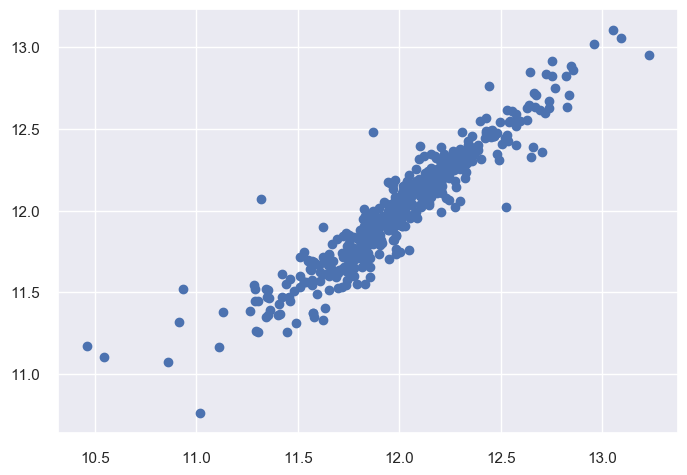

In [47]:
plt.scatter(y_test, y_pred)

In [48]:
#ElasticNet
en = ElasticNet(alpha=0.0005, l1_ratio=0.9)
en.fit(X_train, y_train)
y_pred = en.predict(X_test)
en_mse = mean_squared_error(y_test, y_pred)
print('ElasticNet RMSE: ', np.sqrt(en_mse))

ElasticNet RMSE:  0.1310437707606871


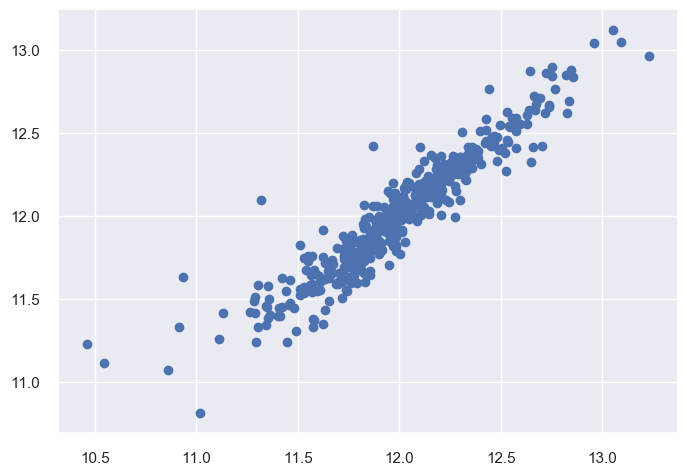

In [49]:
plt.scatter(y_test, y_pred)

In [50]:
#決定木
dt = DecisionTreeRegressor(random_state=1234)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred)
print('Decision Tree RMSE: ', np.sqrt(dt_mse))

Decision Tree RMSE:  0.20266312666269157


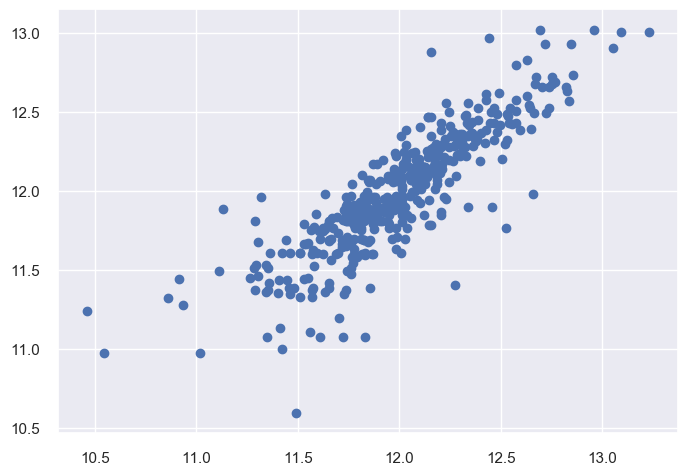

In [51]:
plt.scatter(y_test, y_pred)

In [52]:
#ランダムフォレスト
rf = RandomForestRegressor(random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print('Random Forest RMSE: ', np.sqrt(rf_mse))

Random Forest RMSE:  0.15183226617885093


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
# ハイパーパラメータ探索
rf = RandomForestRegressor(random_state=1234)
params = {'max_depth': [22, 23, 24], 'n_estimators': [290,300,310]}
gscv = GridSearchCV(rf, param_grid=params, verbose=1,cv=3, scoring='neg_mean_squared_error') 
gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
//anaconda3/lib/python3.7/site-packages/sklearn/model_sele

{'max_depth': 23, 'n_estimators': 310}

In [54]:
#ランダムフォレスト
rf = RandomForestRegressor(max_depth = 23, n_estimators = 310, random_state=1234)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred)
print('Random Forest RMSE: ', np.sqrt(rf_mse))

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest RMSE:  0.13712435290500868


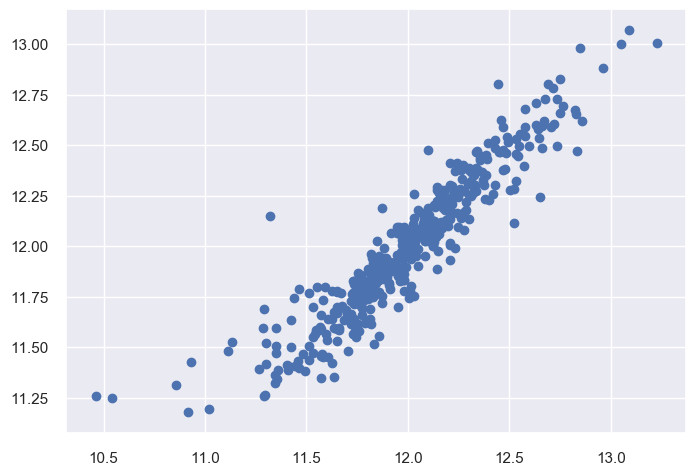

In [55]:
plt.scatter(y_test, y_pred)

In [56]:
#XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
xgb = xgb.XGBRegressor(random_state = 1234)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
print('XGBoost RMSE: ', np.sqrt(xgb_mse))

[13:35:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost RMSE:  0.12236374404021934


In [57]:
# ハイパーパラメータ探索
import xgboost as xgb
from xgboost import XGBRegressor
xgb = xgb.XGBRegressor(random_state = 1234)
params = {'max_depth': [1,2,3], 'n_estimators': [240,250,260]}
gscv = GridSearchCV(xgb, param_grid=params, verbose=1,cv=3, scoring='neg_mean_squared_error') 
gscv.fit(X_train, y_train)
gscv.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[13:35:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[13:35:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:35:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   12.9s finished


[13:35:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'max_depth': 3, 'n_estimators': 250}

In [58]:
#XGBoost
import xgboost as xgb
from xgboost import XGBRegressor
xgb = xgb.XGBRegressor(max_depth = 3, n_estimators = 250, random_state = 1234)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, y_pred)
print('XGBoost RMSE: ', np.sqrt(xgb_mse))

[13:36:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost RMSE:  0.12249872426558796


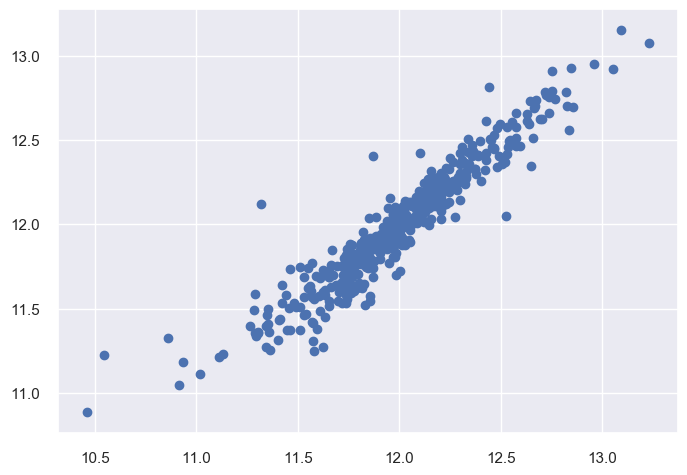

In [59]:
plt.scatter(y_test, y_pred)

In [60]:
test_features = test[feature_cols].values
test_features

array([[ 3.85880666,  1.54096276,  6.22121363, ...,  1.8203341 ,
        13.81829394,  9.42999967],
       [ 3.85880666,  1.8203341 ,  6.2449558 , ...,  1.8203341 ,
        15.09120904,  9.96807981],
       [ 5.68450666,  1.8203341 ,  6.0732894 , ...,  1.8203341 ,
        14.96519126,  9.87191813],
       ...,
       [ 3.85880666,  1.8203341 ,  7.62005626, ...,  0.        ,
        14.82435484,  9.38986571],
       [ 6.33752939,  1.8203341 ,  5.74442043, ...,  1.8203341 ,
        13.99361742,  9.13076014],
       [ 5.68450666,  1.8203341 ,  6.0732894 , ...,  1.8203341 ,
        15.48527262,  9.27189166]])

In [73]:
#線形回帰
my_prediction_lm = lm.predict(test_features)
my_prediction_lm = my_prediction_lm.reshape(-1)
my_prediction_lm .shape

(1459,)

In [65]:
#ElasticNet
my_prediction_en = en.predict(test_features)
my_prediction_en.shape

(1459,)

In [67]:
#決定木
my_prediction_dt = dt.predict(test_features)
my_prediction_dt.shape

(1459,)

In [70]:
#ランダムフォレスト
my_prediction_rf = rf.predict(test_features)
my_prediction_rf.shape

(1459,)

In [74]:
#XGBoost
my_prediction_xgb = xgb.predict(test_features)
my_prediction_xgb.shape

(1459,)

In [107]:
df = pd.DataFrame(my_prediction_lm)
df[1] = pd.DataFrame(my_prediction_en)
df[2] = pd.DataFrame(my_prediction_dt)
df[3] = pd.DataFrame(my_prediction_rf)
df[4] = pd.DataFrame(my_prediction_xgb)
df.head()

,0,1,2,3,4
0,11.827098,11.736009,11.831386,11.730085,11.741792
1,12.089112,11.988634,12.013101,11.946194,11.990289
2,12.219066,12.104395,12.352339,12.073797,12.133373
3,12.309149,12.191590,12.037660,12.089651,12.109495
4,12.222650,12.141408,11.964007,12.200594,12.157488


In [125]:
my_prediction = df.mean(axis=1)
my_prediction = np.array(my_prediction)

In [126]:
my_prediction = np.exp(my_prediction)
print(my_prediction)

[129738.24101082 163646.82075731 194190.38112901 ... 167076.87012012
 115073.15225103 227154.35941934]


In [127]:
test = pd.read_csv('test.csv')

In [128]:
# Idを取得
Id = np.array(test["Id"]).astype(int)

# my_prediction(予測データ）とIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(my_prediction, Id, columns = ["SalePrice"])
 
# 書き出し
#my_solution.to_csv("my_xgboost.csv", index_label = ["Id"])
my_solution.to_csv("my_mix.csv", index_label = ["Id"])